In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

from project_config import ASSETS_CHECKPOINT_SWINIR_DIR_PATH

from mmagic.apis import init_model

/home/featurize/work/AI6126project2/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os.path as osp

checkpoint_file = osp.join(ASSETS_CHECKPOINT_SWINIR_DIR_PATH, 'checkpoint.pth')
config_file = osp.join(ASSETS_CHECKPOINT_SWINIR_DIR_PATH, 'config.py')

model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/featurize/work/AI6126project2/env/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loads checkpoint by local backend from path: /home/featurize/work/AI6126project2/assets/checkpoints/swinir/checkpoint.pth


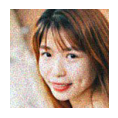

In [3]:
from project_config import DATASET_TEST_DIR_PATH
import numpy as np
import matplotlib.pyplot as plt
import cv2

test_lq_img_file  = osp.join(DATASET_TEST_DIR_PATH, '00000.png')

test_lq_img = cv2.imread(test_lq_img_file, flags=cv2.IMREAD_COLOR_RGB)
# test_lq_img = cv2.imread(test_lq_img_file)

plt.figure(figsize=(1.28, 1.28))
plt.imshow(test_lq_img)
plt.axis('off')
plt.show()

In [4]:
success, encoded = cv2.imencode('.png', test_lq_img)
success, encoded

(True, array([137,  80,  78, ...,  66,  96, 130], dtype=uint8))

In [5]:
sum(p.numel() for p in model.parameters())

929628

In [6]:
type(model), model.training

(mmagic.models.base_models.base_edit_model.BaseEditModel, False)

In [7]:
test_lq_img.shape, type(test_lq_img), test_lq_img.max(), test_lq_img.mean()

((128, 128, 3), numpy.ndarray, 255, 138.19478352864584)

In [8]:
import torch
test_lq_img_torch = torch.from_numpy(test_lq_img).permute(2, 0, 1).unsqueeze(0).float() / 255.0
test_lq_img_torch.shape, test_lq_img_torch.mean()

(torch.Size([1, 3, 128, 128]), tensor(0.5419))

In [9]:
# results = model(test_lq_img_torch)
# results.shape

In [10]:
import torch
from mmagic.apis import MMagicInferencer

model = MMagicInferencer(
    model_name = 'swinir',
    model_config = config_file,
    model_ckpt = checkpoint_file,
    device = torch.device('cuda:0'),
    # extra_parameters = dict(
    #     visualizer = None
    # )
)

/home/featurize/work/AI6126project2/mmagic/mmagic/apis/mmagic_inferencer.py:186: UserWarning: swinir's default config is overridden by /home/featurize/work/AI6126project2/assets/checkpoints/swinir/config.py
  warnings.warn(
/home/featurize/work/AI6126project2/mmagic/mmagic/apis/mmagic_inferencer.py:193: UserWarning: swinir's default checkpoint is overridden by /home/featurize/work/AI6126project2/assets/checkpoints/swinir/checkpoint.pth
  warnings.warn(
/home/featurize/work/AI6126project2/env/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Loads checkpoint by local backend from path: /home/featurize/work/AI6126project2/assets/checkpoints/swinir/checkpoint.pth
04/24 10:33:13 - mmengine - WARNING - Failed to search registry with scope "mmagic" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmagic" is a correct scope, or whether the registry is initialized.


/home/featurize/work/AI6126project2/env/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmagic.visualization.vis_backend.WandbVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [11]:
sum(p.numel() for p in model.parameters())

AttributeError: 'MMagicInferencer' object has no attribute 'parameters'

In [ ]:
test_lq_img_file

'/home/featurize/data/ffhq/test/LQ/00000.png'

In [ ]:
from project_config import RES_SWINIR_DIR_PATH

RES_SWINIR_DIR_PATH

'/home/featurize/work/AI6126project2/res/swinir'

In [ ]:
RES_SWINIR_DIR_PATH.split('/')[-1]

'swinir'

In [ ]:
from project_config import DATASET_TEST_DIR_PATH, DATASET_TEST_REAL_DIR_PATH

DATASET_TEST_REAL_DIR_PATH, DATASET_TEST_DIR_PATH

('/home/featurize/data/ffhq/test/LQ/test_real',
 '/home/featurize/data/ffhq/test/LQ')

In [ ]:
img_dir = DATASET_TEST_DIR_PATH
from tqdm import tqdm

for img_file in tqdm([f for f in os.listdir(img_dir) if f.endswith('.png')]):
    print(img_file)

100%|██████████| 400/400 [00:00<00:00, 104949.43it/s]

00301.png
00309.png
00255.png
00085.png
00101.png
00115.png
00238.png
00189.png
00221.png
00210.png
00379.png
00014.png
00094.png
00186.png
00125.png
00275.png
00227.png
00053.png
00129.png
00172.png
00326.png
00042.png
00168.png
00024.png
00363.png
00370.png
00390.png
00140.png
00177.png
00162.png
00092.png
00065.png
00366.png
00031.png
00281.png
00360.png
00325.png
00341.png
00300.png
00207.png
00008.png
00028.png
00208.png
00061.png
00037.png
00072.png
00231.png
00388.png
00234.png
00156.png
00294.png
00265.png
00369.png
00268.png
00114.png
00120.png
00137.png
00118.png
00282.png
00022.png
00049.png
00386.png
00038.png
00354.png
00313.png
00269.png
00340.png
00284.png
00262.png
00059.png
00272.png
00260.png
00253.png
00271.png
00033.png
00138.png
00142.png
00026.png
00353.png
00093.png
00216.png
00047.png
00349.png
00068.png
00385.png
00310.png
00157.png
00226.png
00343.png
00175.png
00018.png
00111.png
00015.png
00052.png
00195.png
00317.png
00184.png
00295.png
00193.png
00124.png


In [ ]:
from pathlib import Path
type(Path(test_lq_img_file).name), Path(test_lq_img_file).stem, Path(test_lq_img_file).parent

(str, '00000', PosixPath('/home/featurize/data/ffhq/test/LQ'))

In [ ]:
# from project_config import PROJECT_ROOT_DIR_PATH
# result_out_dir = osp.join(PROJECT_ROOT_DIR_PATH, 'out', 'test.png')
# results = model.infer(img=test_lq_img_file, result_out_dir=result_out_dir)
# type(results[0]), type(results[1])


04/24 10:08:59 - mmengine - WARNING - Cannot find key 'gt_img' in data sample.
file_path: /home/featurize/work/AI6126project2/out/test.png
img_ext: .png


(dict, numpy.ndarray)

In [ ]:
# results[0]

{'infer_results': <DataSample(
 
     META INFORMATION
     img_path: '/home/featurize/data/ffhq/test/LQ/00000.png'
     img_output_channel_order: 'rgb'
     padding_size: tensor([0., 0., 0.])
     img_channel_order: 'rgb'
     ori_img_shape: (128, 128, 3)
     img_color_type: 'color'
 
     DATA FIELDS
     input: tensor([[[121.,  96.,  97.,  ..., 121.,  94., 111.],
                  [141., 113., 107.,  ..., 118., 103., 112.],
                  [147., 126., 118.,  ..., 110., 117., 115.],
                  ...,
                  [237., 236., 226.,  ...,  78., 100.,  82.],
                  [242., 232., 238.,  ...,  90.,  91.,  74.],
                  [232., 210., 227.,  ..., 110., 102.,  79.]],
         
                 [[163., 135., 134.,  ..., 153., 158., 181.],
                  [182., 150., 144.,  ..., 155., 161., 172.],
                  [176., 155., 150.,  ..., 154., 163., 162.],
                  ...,
                  [232., 231., 243.,  ..., 125., 156., 141.],
               